In [39]:
import numpy as np
import sys
from theano_lstm import lstm_rnn
from lstm_optimizers import adam_loves_theano, adadelta_fears_committment
from data_managers import character_data_manager

In [ ]:
# Ask Jeeves.
data_butler = character_data_manager('/Users/alex/Desktop/data manager/')

In [8]:
%%time
# Get a network
inp_dim = data_butler.ent_vecs.shape[1]
out_dim = data_butler.ent_vecs.shape[0]-1

net_specs = [ (128,100), (128,100) ]

network = lstm_rnn(inp_dim,net_specs,out_dim)

CPU times: user 13min 21s, sys: 36.1 s, total: 13min 57s
Wall time: 14min 14s


//anaconda/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [9]:
C = np.zeros(0)

In [20]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

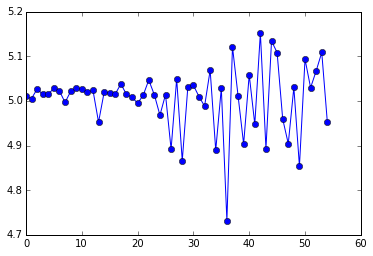

In [35]:
plt.figure();
ax = plt.axes();
ax.plot( C, 'o-' );

In [36]:
for stps in range(10):
    S,T = data_butler.offer_data()
    q = data_butler.get_current_query()
    d = data_butler.get_current_doc()
    this_cost = network.adadelta_step(S,T)
    data_butler.advance_schedule()
    C = np.hstack( (C,this_cost) )
    print this_cost, d['vecs'].shape[0], q['doc']
    sys.stdout.flush()

plt.figure();
ax = plt.axes();
ax.plot( C, 'o-' );

5.14049157024 1061 A_Man_for_All_Seasons_iiii
4.9180802216 477 The_Magus_iiii
4.90755501032 968 The_Magnificent_Ambersons_iiii
4.6551716924 677 The_Master_and_Margarita_iiii
5.25542541507 875 The_Lost_Language_of_Cranes_ii
5.12239273319 939 Mean_Spirit_ii
5.070263178 1061 A_Man_for_All_Seasons_iiii
5.16973857437 1343 The_Lower_Depths_iiii


IndexError: index out of bounds
Apply node that caused the error: Subtensor{int64, int32}(Softmax.0, Constant{0}, ScalarFromTensor.0)
Inputs types: [TensorType(float64, row), Scalar(int64), Scalar(int32)]
Inputs shapes: [(1, 150), (), ()]
Inputs strides: [(1200, 8), (), ()]
Inputs values: ['not shown', 0, 150]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [37]:
T

150